##kNN Introduction



*   Use for classification and regression both
*   non-parametric and instance based
*  Can easily handle non-linear and multiclass problem

  Non-parametric: *do not make strong assumptions about the underlying data distribution*
  
  Instance based : *rely on storing the training data and using it directly for making prediction*

**kNN Training and Testing**

**Training**
*   No training required

**Testing**
*   Find out distance of query point to other points
*  Sort the distance and fiter out the top k
*  Classification : assign the most frequent label to query data
*  Regression: mean of top k values **bold text**





kNN Assumption


*   Homogeneous Neighborhoods : Similar things are close to each other.



**Training/Test time and space complxity**

* Time complexity : O(nd)

* space-complxity: O(nd) #storing all the data



**Limitations of k-NN**

* Time and space complexity




**Bias-Variance Tradeoff in kNNs**

* Small K ---> high Variance

* Large K ---> high Bias

**Impact of Outlier**


##KNN implementation

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

## KNN for classification

***Loading iris dataset***

In [186]:
iris = datasets.load_iris()
X =pd.DataFrame(iris.data)
y = pd.DataFrame(iris.target)

#### Preprocessing of data


In [187]:
X.shape, y.shape

((150, 4), (150, 1))

In [188]:
X.head()

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [190]:
 X.columns =['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']

In [192]:
X.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [193]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB


In [194]:
X.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [197]:
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


In [198]:
y.columns = ['Species']

In [202]:
y.sample(5)

,Species
77,1
105,2
34,0
136,2
119,2


In [203]:
y.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   Species  150 non-null    int64
dtypes: int64(1)
memory usage: 1.3 KB


In [204]:
y.describe()

,Species
count,150.000000
mean,1.000000
std,0.819232
min,0.000000
25%,0.000000
50%,1.000000
75%,2.000000
max,2.000000


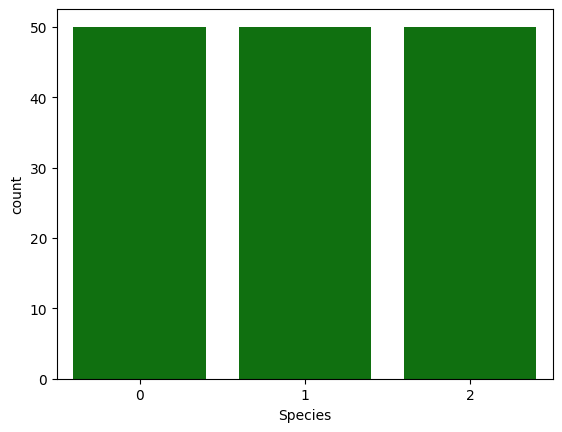

In [205]:
sns.countplot(data=y,x='Species', color='green')
plt.show()

In [206]:
# import necessary libraries

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [207]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=28)

#scaling the data
standardScaler = StandardScaler()
X_train_scaled = standardScaler.fit_transform(X_train)
X_test_scaled = standardScaler.transform(X_test)

In [212]:
X_train_scaled.shape, X_test_scaled.shape,y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 1), (30, 1))

In [224]:
y_train['Species']

,Species
21,0
144,2
92,1
27,0
77,1
...,...
3,0
32,0
22,0
5,0


###KNN using sklearn

In [213]:
from sklearn.neighbors import KNeighborsClassifier

#model fit and predict
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled,y_train)
y_pred = knn.predict( X_test_scaled)

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:238: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [214]:
X_test_scaled[0]

array([-1.21536749,  0.82089746, -1.03799331, -1.30853512])

In [219]:
# Evaluate the model

def model_evaluation(y_test, y_pred):
    print("Accuracy Score")
    print(accuracy_score(y_test, y_pred))

    print("\n Confusion Matrix")
    print(confusion_matrix(y_test, y_pred))

    print("\n Classification Report")
    print(classification_report(y_test,y_pred))

    #display few predictions
    df = pd.DataFrame({"Acutal" : y_test, "Predicted" : y_pred})
    print(df.head())

In [225]:
model_evaluation(y_test['Species'], y_pred)

Accuracy Score
0.9666666666666667

 Confusion Matrix
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

     Acutal  Predicted
24        0          0
134       2          2
81        1          1
14        0          0
114       2          2


### KNN-C from scratch

**Step for knn from scratch**
*  calculate distance
*   store distance with label
*  sort the distance with label
* store top k in np arrya
* find unique count and get count
*  get max_count
* get index of max_count

In [234]:
def  knnc(X,y, querypoint,k):

  # calculate Euclidean distance
  dist =  np.sqrt(np.sum((querypoint-X)**2, axis=1))

  # store distance with label
  distance = [(dist[i], y.iloc[i]) for i in range(len(dist))]

  # sort the distance
  sorted_dist = sorted(distance)

  # pick top k
  top_k = sorted_dist[:k]

  # convert it to numpy
  top_k = np.array(top_k)

  # get unique count
  unique_number, count = np.unique(top_k[:,-1], return_counts=True)

  #get max_count
  index = count.argmax()
  pred = unique_number[index]

  return int(pred), top_k


In [235]:
knnc(X_train_scaled,y_train['Species'],  X_test_scaled[2],k=5)

(1,
 array([[0.14384192, 1.        ],
        [0.31748998, 1.        ],
        [0.4925018 , 1.        ],
        [0.54284065, 1.        ],
        [0.67170265, 1.        ]]))

In [236]:
y_pred = []

for i in range(X_test_scaled.shape[0]):
  output, _ = knnc(X_train_scaled,y_train['Species'],  X_test_scaled[i],k=5 )
  y_pred.append(output)

In [238]:
model_evaluation(y_test['Species'], y_pred)

Accuracy Score
0.9666666666666667

 Confusion Matrix
[[ 9  0  0]
 [ 0 10  1]
 [ 0  0 10]]

 Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         9
           1       1.00      0.91      0.95        11
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30

     Acutal  Predicted
24        0          0
134       2          2
81        1          1
14        0          0
114       2          2


## KNN for Regression